In [35]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torch.optim as optim
import torchvision.datasets as datasets
import imageio
import numpy as np
import matplotlib
from torchvision.utils import make_grid, save_image
from torch.utils.data import DataLoader
from matplotlib import pyplot as plt
from tqdm import tqdm

# Define learning parameters

In [36]:
# learning parameters
batch_size = 512
epochs = 100
sample_size = 64 # fixed sample size for generator
nz = 128 # latent vector size
k = 1 # number of steps to apply to the discriminator
device = torch.device('mps' if torch.backends.mps.is_available() else 'cpu')

# Prepare training dataset

In [37]:
transform = transforms.Compose([
                                transforms.ToTensor(),
                                transforms.Normalize((0.5,),(0.5,)),
])
to_pil_image = transforms.ToPILImage()

# Make input, output folders
!mkdir -p input
!mkdir -p outputs

# Load train data
train_data = datasets.MNIST(
    root='input/data',
    train=True,
    download=True,
    transform=transform
)
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)

# Generator

In [38]:
class Generator(nn.Module):
    def __init__(self, nz):
        super(Generator, self).__init__()
        self.nz = nz
        self.main = nn.Sequential(
            nn.Linear(self.nz, 256),
            nn.LeakyReLU(0.2),
            nn.Linear(256, 512),
            nn.LeakyReLU(0.2),
            nn.Linear(512, 1024),
            nn.LeakyReLU(0.2),
            nn.Linear(1024, 784),
            nn.Tanh(),
        )
    def forward(self, x):
        return self.main(x).view(-1, 1, 28, 28)

# Discriminator

In [39]:
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.n_input = 784
        self.main = nn.Sequential(
            nn.Linear(self.n_input, 1024),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(1024, 512),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(512, 256),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(256, 1),
            nn.Sigmoid(),
        )
    def forward(self, x):
        x = x.view(-1, 784)
        return self.main(x)

In [40]:
generator = Generator(nz).to(device)
discriminator = Discriminator().to(device)
print('##### GENERATOR #####')
print(generator)
print('######################')
print('\n##### DISCRIMINATOR #####')
print(discriminator)
print('######################')

##### GENERATOR #####
Generator(
  (main): Sequential(
    (0): Linear(in_features=128, out_features=256, bias=True)
    (1): LeakyReLU(negative_slope=0.2)
    (2): Linear(in_features=256, out_features=512, bias=True)
    (3): LeakyReLU(negative_slope=0.2)
    (4): Linear(in_features=512, out_features=1024, bias=True)
    (5): LeakyReLU(negative_slope=0.2)
    (6): Linear(in_features=1024, out_features=784, bias=True)
    (7): Tanh()
  )
)
######################

##### DISCRIMINATOR #####
Discriminator(
  (main): Sequential(
    (0): Linear(in_features=784, out_features=1024, bias=True)
    (1): LeakyReLU(negative_slope=0.2)
    (2): Dropout(p=0.3, inplace=False)
    (3): Linear(in_features=1024, out_features=512, bias=True)
    (4): LeakyReLU(negative_slope=0.2)
    (5): Dropout(p=0.3, inplace=False)
    (6): Linear(in_features=512, out_features=256, bias=True)
    (7): LeakyReLU(negative_slope=0.2)
    (8): Dropout(p=0.3, inplace=False)
    (9): Linear(in_features=256, out_features=1

# Tools for training

In [41]:
# optimizers
optim_g = optim.Adam(generator.parameters(), lr=0.0002)
optim_d = optim.Adam(discriminator.parameters(), lr=0.0002)

In [42]:
# loss function
criterion = nn.BCELoss() # Binary Cross Entropy loss

In [43]:
losses_g = [] # to store generator loss after each epoch
losses_d = [] # to store discriminator loss after each epoch
images = [] # to store images generatd by the generator

In [44]:
# to create real labels (1s)
def label_real(size):
    data = torch.ones(size, 1) - 0.1
    return data.to(device)
# to create fake labels (0s)
def label_fake(size):
    data = torch.zeros(size, 1)
    return data.to(device)


In [45]:
# function to create the noise vector
def create_noise(sample_size, nz):
    return torch.randn(sample_size, nz).to(device)

In [46]:
# to save the images generated by the generator
def save_generator_image(image, path):
    save_image(image, path)

In [47]:
# create the noise vector - fixed to track how GAN is trained.
noise = create_noise(sample_size, nz)

# Q. Write training loop

118it [00:05, 20.85it/s]                                                           


Epoch 1 of 100
Generator loss: 1.78030933, Discriminator loss: 0.90574124


118it [00:05, 20.93it/s]                                                           


Epoch 2 of 100
Generator loss: 1.85315792, Discriminator loss: 1.39241118


118it [00:05, 20.85it/s]                                                           


Epoch 3 of 100
Generator loss: 2.42489856, Discriminator loss: 1.15964267


118it [00:05, 20.76it/s]                                                           


Epoch 4 of 100
Generator loss: 2.27450839, Discriminator loss: 1.28443884


118it [00:05, 20.96it/s]                                                           
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


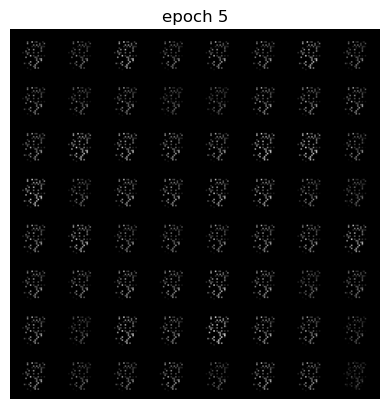

Epoch 5 of 100
Generator loss: 1.55694905, Discriminator loss: 1.25833279


118it [00:05, 21.03it/s]                                                           


Epoch 6 of 100
Generator loss: 1.00988910, Discriminator loss: 1.23472605


118it [00:05, 21.40it/s]                                                           


Epoch 7 of 100
Generator loss: 1.91251527, Discriminator loss: 1.16686163


118it [00:05, 21.47it/s]                                                           


Epoch 8 of 100
Generator loss: 1.02769018, Discriminator loss: 1.04622808


118it [00:05, 21.62it/s]                                                           


Epoch 9 of 100
Generator loss: 1.51565007, Discriminator loss: 1.04721759


118it [00:05, 21.60it/s]                                                           
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


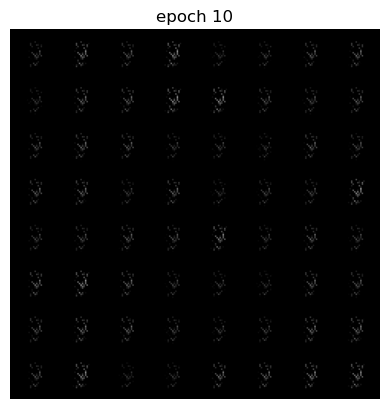

Epoch 10 of 100
Generator loss: 2.11860088, Discriminator loss: 0.84335369


118it [00:05, 21.22it/s]                                                           


Epoch 11 of 100
Generator loss: 2.47334731, Discriminator loss: 0.75685547


118it [00:05, 21.39it/s]                                                           


Epoch 12 of 100
Generator loss: 2.74626223, Discriminator loss: 0.86100700


118it [00:05, 21.53it/s]                                                           


Epoch 13 of 100
Generator loss: 2.54562864, Discriminator loss: 0.99421666


118it [00:05, 21.63it/s]                                                           


Epoch 14 of 100
Generator loss: 2.04203540, Discriminator loss: 0.87524619


118it [00:05, 21.61it/s]                                                           
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


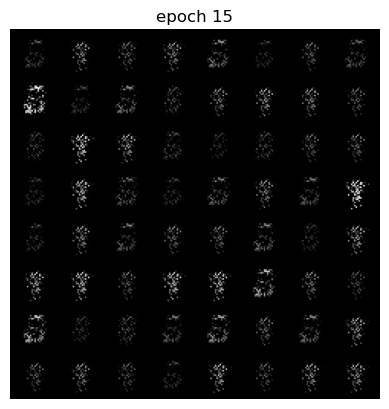

Epoch 15 of 100
Generator loss: 2.23843199, Discriminator loss: 0.92359076


118it [00:05, 21.31it/s]                                                           


Epoch 16 of 100
Generator loss: 2.27545841, Discriminator loss: 0.87201990


118it [00:05, 21.29it/s]                                                           


Epoch 17 of 100
Generator loss: 2.31846287, Discriminator loss: 0.89182200


118it [00:05, 21.41it/s]                                                           


Epoch 18 of 100
Generator loss: 2.71313366, Discriminator loss: 0.79537088


118it [00:05, 21.36it/s]                                                           


Epoch 19 of 100
Generator loss: 2.99268676, Discriminator loss: 0.74709314


118it [00:05, 20.91it/s]                                                           
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


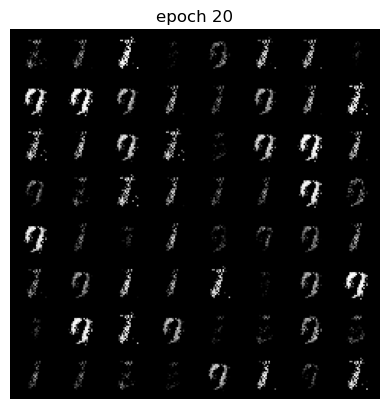

Epoch 20 of 100
Generator loss: 2.45131484, Discriminator loss: 0.89162352


118it [00:05, 20.96it/s]                                                           


Epoch 21 of 100
Generator loss: 2.35117696, Discriminator loss: 0.86099523


118it [00:05, 20.67it/s]                                                           


Epoch 22 of 100
Generator loss: 2.81996452, Discriminator loss: 0.73859640


118it [00:05, 21.40it/s]                                                           


Epoch 23 of 100
Generator loss: 2.90828988, Discriminator loss: 0.74131816


118it [00:05, 21.47it/s]                                                           


Epoch 24 of 100
Generator loss: 3.68120368, Discriminator loss: 0.68460396


118it [00:05, 21.32it/s]                                                           
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


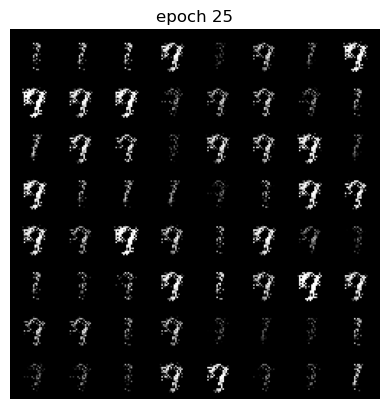

Epoch 25 of 100
Generator loss: 3.28268844, Discriminator loss: 0.73783756


118it [00:05, 21.30it/s]                                                           


Epoch 26 of 100
Generator loss: 3.16418094, Discriminator loss: 0.65601445


118it [00:05, 20.91it/s]                                                           


Epoch 27 of 100
Generator loss: 2.69266163, Discriminator loss: 0.82826536


118it [00:05, 21.43it/s]                                                           


Epoch 28 of 100
Generator loss: 3.01046307, Discriminator loss: 0.69130862


118it [00:05, 21.71it/s]                                                           


Epoch 29 of 100
Generator loss: 3.15065157, Discriminator loss: 0.68055254


118it [00:05, 21.25it/s]                                                           
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


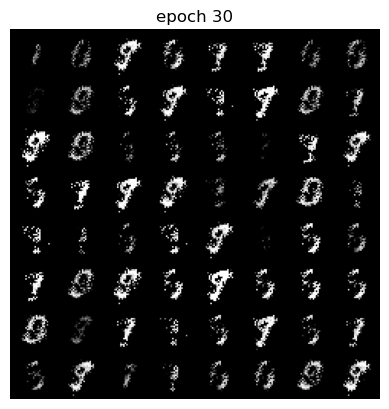

Epoch 30 of 100
Generator loss: 3.05028972, Discriminator loss: 0.75437450


118it [00:05, 21.28it/s]                                                           


Epoch 31 of 100
Generator loss: 3.34891858, Discriminator loss: 0.64480192


118it [00:05, 21.54it/s]                                                           


Epoch 32 of 100
Generator loss: 3.34819053, Discriminator loss: 0.67346143


118it [00:05, 21.53it/s]                                                           


Epoch 33 of 100
Generator loss: 3.03677065, Discriminator loss: 0.77654564


118it [00:05, 20.88it/s]                                                           


Epoch 34 of 100
Generator loss: 2.84888218, Discriminator loss: 0.72413632


118it [00:05, 21.51it/s]                                                           
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


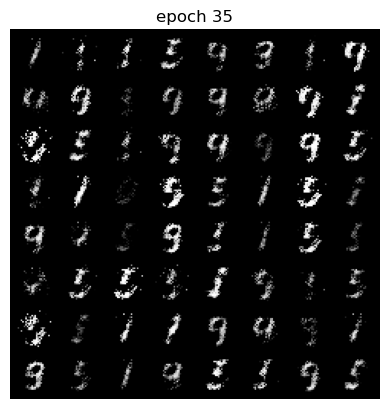

Epoch 35 of 100
Generator loss: 3.14505633, Discriminator loss: 0.67890818


118it [00:05, 21.15it/s]                                                           


Epoch 36 of 100
Generator loss: 3.29320204, Discriminator loss: 0.67499737


118it [00:05, 21.50it/s]                                                           


Epoch 37 of 100
Generator loss: 3.47426269, Discriminator loss: 0.73512228


118it [00:05, 21.21it/s]                                                           


Epoch 38 of 100
Generator loss: 3.38174674, Discriminator loss: 0.75663895


118it [00:05, 21.35it/s]                                                           


Epoch 39 of 100
Generator loss: 2.91966550, Discriminator loss: 0.74295400


118it [00:05, 21.20it/s]                                                           
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


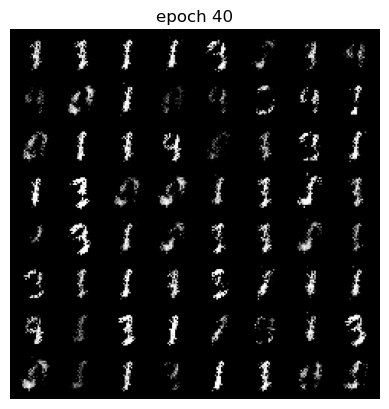

Epoch 40 of 100
Generator loss: 3.23145552, Discriminator loss: 0.66394705


118it [00:05, 21.31it/s]                                                           


Epoch 41 of 100
Generator loss: 3.32341223, Discriminator loss: 0.70551361


118it [00:05, 21.61it/s]                                                           


Epoch 42 of 100
Generator loss: 3.40780235, Discriminator loss: 0.67417917


118it [00:05, 20.24it/s]                                                           


Epoch 43 of 100
Generator loss: 3.34375236, Discriminator loss: 0.68559551


118it [00:05, 21.52it/s]                                                           


Epoch 44 of 100
Generator loss: 3.57840593, Discriminator loss: 0.66088598


118it [00:05, 21.76it/s]                                                           
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


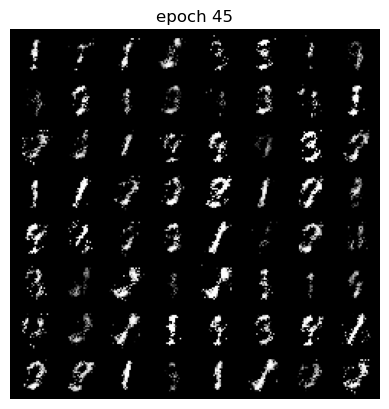

Epoch 45 of 100
Generator loss: 3.28527655, Discriminator loss: 0.71920101


118it [00:05, 20.99it/s]                                                           


Epoch 46 of 100
Generator loss: 3.17913353, Discriminator loss: 0.70401728


118it [00:05, 20.84it/s]                                                           


Epoch 47 of 100
Generator loss: 3.12064586, Discriminator loss: 0.71651058


118it [00:05, 19.90it/s]                                                           


Epoch 48 of 100
Generator loss: 3.08069123, Discriminator loss: 0.71009941


118it [00:05, 20.06it/s]                                                           


Epoch 49 of 100
Generator loss: 3.23547743, Discriminator loss: 0.69981860


118it [00:05, 20.22it/s]                                                           
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


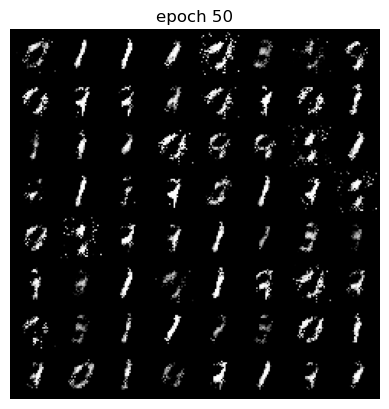

Epoch 50 of 100
Generator loss: 3.04146419, Discriminator loss: 0.77673269


118it [00:05, 20.45it/s]                                                           


Epoch 51 of 100
Generator loss: 3.02864659, Discriminator loss: 0.73959681


118it [00:05, 20.19it/s]                                                           


Epoch 52 of 100
Generator loss: 2.81018637, Discriminator loss: 0.74385048


118it [00:05, 20.91it/s]                                                           


Epoch 53 of 100
Generator loss: 3.01780087, Discriminator loss: 0.72039988


118it [00:05, 21.38it/s]                                                           


Epoch 54 of 100
Generator loss: 3.00292294, Discriminator loss: 0.72811681


118it [00:05, 20.33it/s]                                                           
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


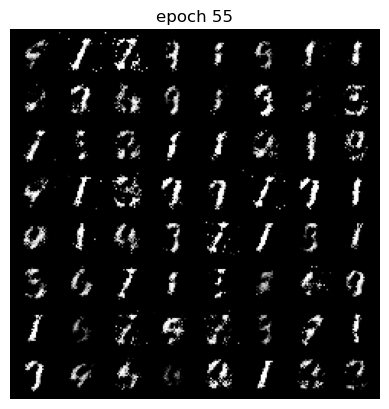

Epoch 55 of 100
Generator loss: 2.67040462, Discriminator loss: 0.77219327


118it [00:05, 20.28it/s]                                                           


Epoch 56 of 100
Generator loss: 2.76582126, Discriminator loss: 0.75188708


118it [00:05, 20.68it/s]                                                           


Epoch 57 of 100
Generator loss: 2.67911257, Discriminator loss: 0.77810852


118it [00:05, 20.91it/s]                                                           


Epoch 58 of 100
Generator loss: 2.74896051, Discriminator loss: 0.77609831


118it [00:05, 20.09it/s]                                                           


Epoch 59 of 100
Generator loss: 2.65331934, Discriminator loss: 0.76108813


118it [00:05, 20.52it/s]                                                           
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


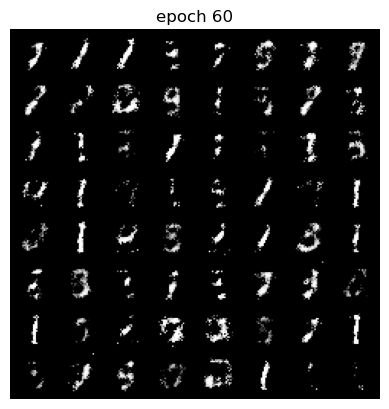

Epoch 60 of 100
Generator loss: 2.82992411, Discriminator loss: 0.74771226


118it [00:05, 20.85it/s]                                                           


Epoch 61 of 100
Generator loss: 2.70615449, Discriminator loss: 0.76750279


118it [00:05, 20.64it/s]                                                           


Epoch 62 of 100
Generator loss: 2.64232166, Discriminator loss: 0.78653759


118it [00:05, 21.28it/s]                                                           


Epoch 63 of 100
Generator loss: 2.69112567, Discriminator loss: 0.77572546


118it [00:05, 20.58it/s]                                                           


Epoch 64 of 100
Generator loss: 2.59016315, Discriminator loss: 0.79839479


118it [00:05, 20.86it/s]                                                           
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


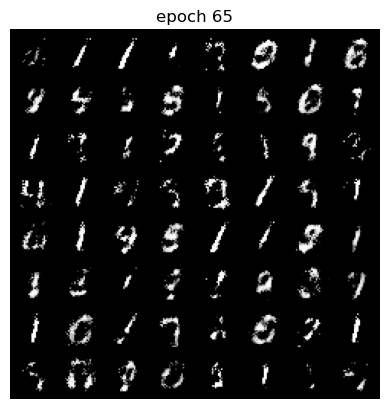

Epoch 65 of 100
Generator loss: 2.66900865, Discriminator loss: 0.81047345


118it [00:05, 21.46it/s]                                                           


Epoch 66 of 100
Generator loss: 2.45949170, Discriminator loss: 0.84912655


118it [00:05, 21.76it/s]                                                           


Epoch 67 of 100
Generator loss: 2.43178873, Discriminator loss: 0.83913065


118it [00:05, 21.97it/s]                                                           


Epoch 68 of 100
Generator loss: 2.48267557, Discriminator loss: 0.82022767


118it [00:05, 20.56it/s]                                                           


Epoch 69 of 100
Generator loss: 2.44989549, Discriminator loss: 0.81996948


118it [00:05, 20.29it/s]                                                           
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


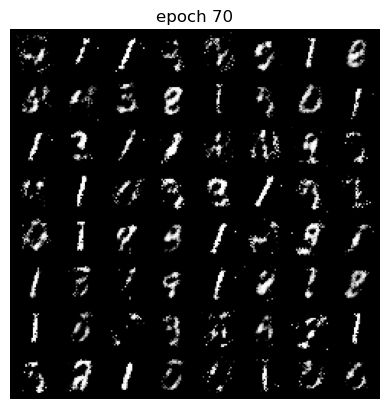

Epoch 70 of 100
Generator loss: 2.56900038, Discriminator loss: 0.79244317


118it [00:05, 20.96it/s]                                                           


Epoch 71 of 100
Generator loss: 2.52805559, Discriminator loss: 0.83246011


118it [00:05, 21.15it/s]                                                           


Epoch 72 of 100
Generator loss: 2.54907958, Discriminator loss: 0.81543266


118it [00:05, 21.55it/s]                                                           


Epoch 73 of 100
Generator loss: 2.49413206, Discriminator loss: 0.84662976


118it [00:05, 21.79it/s]                                                           


Epoch 74 of 100
Generator loss: 2.45533972, Discriminator loss: 0.82762691


118it [00:05, 21.13it/s]                                                           
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


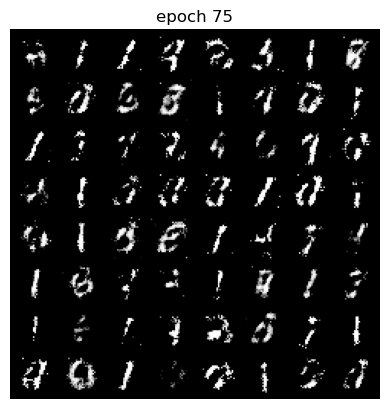

Epoch 75 of 100
Generator loss: 2.44527900, Discriminator loss: 0.83742623


118it [00:05, 21.46it/s]                                                           


Epoch 76 of 100
Generator loss: 2.44799129, Discriminator loss: 0.83382466


118it [00:05, 21.28it/s]                                                           


Epoch 77 of 100
Generator loss: 2.32583805, Discriminator loss: 0.84507417


118it [00:05, 21.33it/s]                                                           


Epoch 78 of 100
Generator loss: 2.37811519, Discriminator loss: 0.85309043


118it [00:05, 21.53it/s]                                                           


Epoch 79 of 100
Generator loss: 2.30023880, Discriminator loss: 0.86306210


118it [00:05, 21.09it/s]                                                           
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


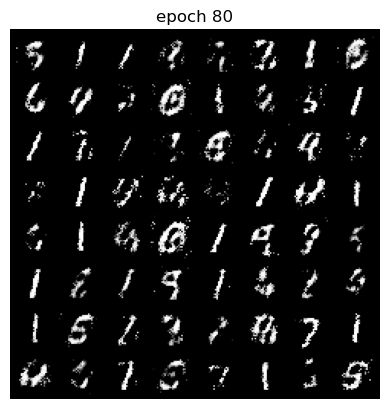

Epoch 80 of 100
Generator loss: 2.40444247, Discriminator loss: 0.84273721


118it [00:05, 21.04it/s]                                                           


Epoch 81 of 100
Generator loss: 2.40065537, Discriminator loss: 0.82984285


118it [00:05, 21.02it/s]                                                           


Epoch 82 of 100
Generator loss: 2.33527093, Discriminator loss: 0.82338006


118it [00:05, 21.24it/s]                                                           


Epoch 83 of 100
Generator loss: 2.35264338, Discriminator loss: 0.83118797


118it [00:05, 21.78it/s]                                                           


Epoch 84 of 100
Generator loss: 2.36707728, Discriminator loss: 0.83260843


118it [00:05, 21.52it/s]                                                           
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


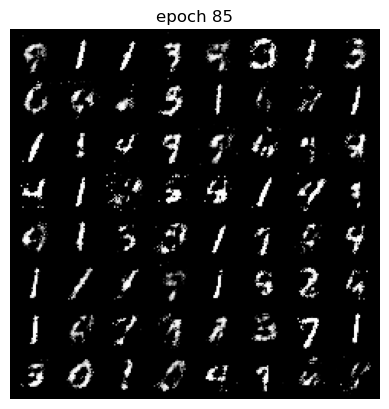

Epoch 85 of 100
Generator loss: 2.36895294, Discriminator loss: 0.85909970


118it [00:05, 20.93it/s]                                                           


Epoch 86 of 100
Generator loss: 2.35293903, Discriminator loss: 0.86439095


118it [00:05, 21.29it/s]                                                           


Epoch 87 of 100
Generator loss: 2.40649461, Discriminator loss: 0.86823591


118it [00:05, 21.49it/s]                                                           


Epoch 88 of 100
Generator loss: 2.31976875, Discriminator loss: 0.87727424


118it [00:05, 21.21it/s]                                                           


Epoch 89 of 100
Generator loss: 2.30309095, Discriminator loss: 0.85807270


118it [00:05, 21.36it/s]                                                           
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


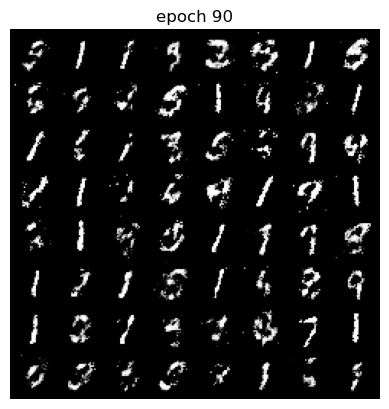

Epoch 90 of 100
Generator loss: 2.25729336, Discriminator loss: 0.86954053


118it [00:05, 20.91it/s]                                                           


Epoch 91 of 100
Generator loss: 2.21856712, Discriminator loss: 0.87057674


118it [00:05, 21.27it/s]                                                           


Epoch 92 of 100
Generator loss: 2.19361605, Discriminator loss: 0.86879648


118it [00:05, 21.16it/s]                                                           


Epoch 93 of 100
Generator loss: 2.22707573, Discriminator loss: 0.86665973


118it [00:05, 20.84it/s]                                                           


Epoch 94 of 100
Generator loss: 2.17278978, Discriminator loss: 0.88284445


118it [00:05, 21.43it/s]                                                           
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


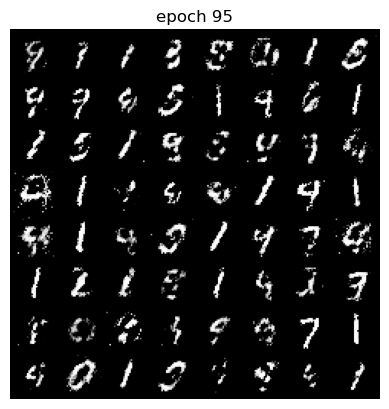

Epoch 95 of 100
Generator loss: 2.11743227, Discriminator loss: 0.90385909


118it [00:05, 21.13it/s]                                                           


Epoch 96 of 100
Generator loss: 2.05723130, Discriminator loss: 0.90488774


118it [00:05, 21.28it/s]                                                           


Epoch 97 of 100
Generator loss: 2.18350268, Discriminator loss: 0.87223865


118it [00:05, 20.36it/s]                                                           


Epoch 98 of 100
Generator loss: 2.18397851, Discriminator loss: 0.90012854


118it [00:05, 21.31it/s]                                                           


Epoch 99 of 100
Generator loss: 2.03349075, Discriminator loss: 0.92668010


118it [00:05, 20.73it/s]                                                           
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


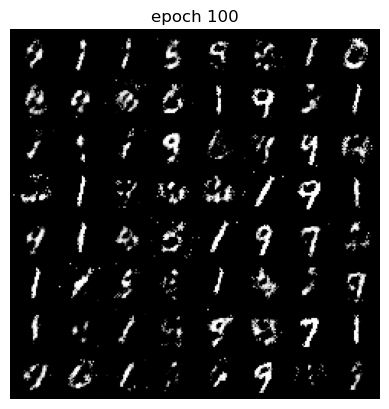

Epoch 100 of 100
Generator loss: 2.04300951, Discriminator loss: 0.92543301


In [48]:
torch.manual_seed(7777)

def generator_loss(output, true_label):
    ############ YOUR CODE HERE ##########
    return criterion(output, true_label)
    
    
def discriminator_loss(output, true_label):
    ############ YOUR CODE HERE ##########
    return criterion(output, true_label)
    
    

    

for epoch in range(epochs):
    loss_g = 0.0
    loss_d = 0.0
    for bi, data in tqdm(enumerate(train_loader), total=int(len(train_data)/train_loader.batch_size)):
        ############ YOUR CODE HERE ########## 
        # print(bi, len(data[0]))
        real_labels = label_real(len(data[0]))
        fake_labels = label_fake(len(data[0]))
        
        
        real_images = data[0].to(device)
        
        
        z = create_noise(len(data[0]), nz)
        generated_images = generator(z)
        discriminator.zero_grad()
        d_loss_real = criterion(discriminator(real_images), real_labels)
        d_loss_fake = criterion(discriminator(generated_images.detach()), fake_labels)
        d_loss = d_loss_real + d_loss_fake
        loss_d += d_loss.item()
        d_loss.backward()
        optim_d.step()
        
        z = create_noise(len(data[0]), nz)
        generated_images = generator(z)
        generator.zero_grad()
        g_loss = generator_loss(discriminator(generated_images), real_labels)
        loss_g += g_loss.item()
        g_loss.backward()
        optim_g.step()
        
        
        
    
    
    # create the final fake image for the epoch
    generated_img = generator(noise).cpu().detach()
    
    # make the images as grid
    generated_img = make_grid(generated_img)
    
    # visualize generated images
    if (epoch + 1) % 5 == 0:
        plt.imshow(generated_img.permute(1, 2, 0))
        plt.title(f'epoch {epoch+1}')
        plt.axis('off')
        plt.show()
    
    # save the generated torch tensor models to disk
    save_generator_image(generated_img, f"outputs/gen_img{epoch+1}.png")
    images.append(generated_img)
    epoch_loss_g = loss_g / bi # total generator loss for the epoch
    epoch_loss_d = loss_d / bi # total discriminator loss for the epoch
    losses_g.append(epoch_loss_g)
    losses_d.append(epoch_loss_d)
    
    print(f"Epoch {epoch+1} of {epochs}")
    print(f"Generator loss: {epoch_loss_g:.8f}, Discriminator loss: {epoch_loss_d:.8f}")

In [49]:
print('DONE TRAINING')
torch.save(generator.state_dict(), 'outputs/generator.pth')

DONE TRAINING


In [50]:
# save the generated images as GIF file
imgs = [np.array(to_pil_image(img)) for img in images]
imageio.mimsave('outputs/generator_images.gif', imgs)

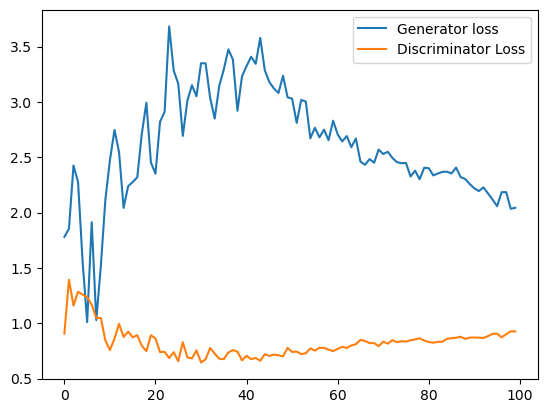

In [51]:
# plot and save the generator and discriminator loss
plt.figure()
plt.plot(losses_g, label='Generator loss')
plt.plot(losses_d, label='Discriminator Loss')
plt.legend()
plt.savefig('outputs/loss.png')